In [9]:
from Libs.libs import *

# Kris Naik

## Building a chatbot using LangGraph

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
#stategraph is used for state management. 
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list, add_messages]# message add garne to keep track of the state
    

graph_builder = StateGraph(State)

In [4]:
graph_builder

In [5]:
def chatbot(state:State): # based on the statbe, the state management will happen
    return {"messages":llm.invoke(state['messages'])}

In [6]:
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [8]:
graph = graph_builder.compile()

In [9]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [10]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

In [11]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({"messages":("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant", value["messages"].content)

# AI with Misbah

## Example 1

In [2]:

def function_1(input_1):
    return input_1 + " Hi from function 1."

def function_2(input_2):
    return input_2 + " Hi from function 2."




In [3]:
from langgraph.graph import Graph
workflow = Graph()
workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)
workflow.add_edge("node_1", "node_2")
workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [4]:
app.invoke("Hello")

'Hello Hi from function 1. Hi from function 2.'

In [7]:
input = "Hello"
for output in app.stream(input):
    for key, value in output.items():
        print(f"output from node {key}:")
        print(value)
        # print("---------")
    print("\n-------------\n")

output from node node_1:
Hello Hi from function 1.

-------------

output from node node_2:
Hello Hi from function 1. Hi from function 2.

-------------



## Example 2

In [15]:
llm.invoke("hi").content

'Hello! How can I assist you today?'

In [18]:
def function_1(input_1):
    response = llm.invoke(input_1)
    return response.content

def function_2(input_2):
    return "Agent says: " + input_2

In [21]:
workflow = Graph()
workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)
workflow.add_edge('agent', 'node_2')

workflow.set_entry_point('agent')
workflow.set_finish_point('node_2')

app = workflow.compile()

In [22]:
app.invoke("Hi my name is ajeet.")

'Agent says: Hi Ajeet! How can I assist you today?'

In [23]:
input = "Hello"
for output in app.stream(input):
    for key, value in output.items():
        print(f"output from node, {key}: {value}")
        print("----------------------------")
        
        

output from node, agent: Hello! How can I assist you today?
_--------------_______-------
output from node, node_2: Agent says: Hello! How can I assist you today?
_--------------_______-------


## Example 3

In [24]:
def function_1(input_1):
    complete_query = f"yCLB4478CEFour task is to provide only the city name based on the user query\
        Nothing more, just the city name mentioned from the query: {input_1}"
    response = llm.invoke(complete_query)
    return response.content

def function_2(input_2):
    return "Agent says"+ input_2

In [26]:
workflow = Graph()
workflow.add_node('agent', function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('agent','node_2')
workflow.set_entry_point("agent")
workflow.set_finish_point('node_2')

app = workflow.compile()

## Agent State


In [30]:
AgentState = {} 

AgentState['messages'] = []

In [31]:
AgentState

{'messages': []}

In [ ]:
def function_1(state):
    messages = state['memory']
    user_input = messages[-1]
    complete_query = f"Your task is to provide only the city name based on the user query\
    Nothing more, just the city name mentioned from the query: {user_input}"
    response = llm.invoke(complete_query)
    return state

def function_2(state):
    messages = state['messages']
    agent_response = messages[-1]
    

    

In [ ]:
from typing import TypedDict

## Lnggraph official

In [210]:
from Libs.libs import *

from pydantic import BaseModel
from typing import Literal

# class routeResponse(BaseModel):
#     next:Literal['Researcher', "FINISH", 'Coder']

# prompt = ChatPromptTemplate.from_messages(
#     [
#         (
#             "system",
#             """You are a supervisor tasked with managing a conversation between the following workers:  {members}. Given the following user request,respond with the worker to act next. Each worker will perform atask and respond with their results and status. When finished,respond with FINISH"""
#         ),
#         (
#             "system",
#             """Given the conversation above, who should act next? Or should we FINISH? Select one of: {options}""")
#         ("placeholder", "{agent_scratchpad}"),
#         ("placeholder", "{chat_history}"),
#         ("human", "{query}")
#     ]
# ).partial(options  = str(options), members = ", ".join(members))


    

In [5]:
members = ["Mercedes", "Lamborghini"]

options = ["FINISH"] + members

conditional_map = {k:k for k in members}

In [6]:
conditional_map

{'Mercedes': 'Mercedes', 'Lamborghini': 'Lamborghini'}

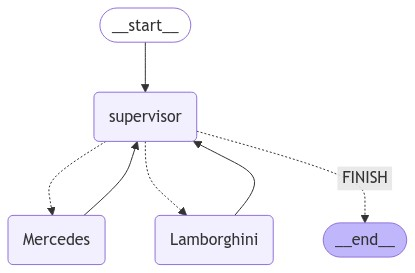

entered here in the agent
entered here in the agent


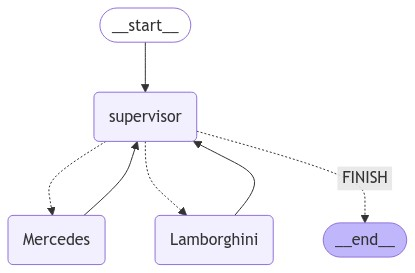

In [1]:
from Libs.libs import *
from graph import  graph

from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [1]:
# user_input = "Tell me about mercedes g wagon"
# # graph.invoke({"input":user_input})
# for s in graph.stream(
#     {
#         "messages":[HumanMessage(content=user_input)],
#     }, 
#     {
#         "recursion_limit": 2
#     },
# ):
#     if "__end__" not in s:
#         print(s)
#         print("-----")

In [100]:
import pandas as pd
df = pd.read_csv(f"./data/syntetic_data/availability.csv")
df

,date_slot,specialization,doctor_name,is_available,patient_to_attend
0,2024-08-05 08:00,general_dentist,john doe,False,1000001.0
1,2024-08-05 08:30,general_dentist,john doe,False,1000082.0
2,2024-08-05 09:00,general_dentist,john doe,False,1000048.0
3,2024-08-05 09:30,general_dentist,john doe,False,1000036.0
4,2024-08-05 10:00,general_dentist,john doe,False,1000024.0
...,...,...,...,...,...
4275,2024-09-03 14:30,orthodontist,kevin anderson,True,NaN
4276,2024-09-03 15:00,orthodontist,kevin anderson,True,NaN
4277,2024-09-03 15:30,orthodontist,kevin anderson,True,NaN
4278,2024-09-03 16:00,orthodontist,kevin anderson,True,NaN


In [101]:
df['date_slot'].apply(lambda x: x.split(' ')[-1])

0       08:00
1       08:30
2       09:00
3       09:30
4       10:00
        ...  
4275    14:30
4276    15:00
4277    15:30
4278    16:00
4279    16:30
Name: date_slot, Length: 4280, dtype: object

In [102]:
from pydantic import BaseModel, field_validator, Field


class DateModel(BaseModel):
    """
    The way the date should be structured and formatted
    """
    date: str = Field(..., description="Propertly formatted date", pattern=r'^\d{4}-\d{2}-\d{2}$')

    @field_validator("date")
    def check_format_date(cls, v):
        if not re.match(r'^\d{4}-\d{2}-\d{2}$', v):
            raise ValueError("The date must be in the format 'YYYY-MM-DD'")
        return v



In [103]:
df['date_slot'].apply(lambda x: x.split(' ')[-0]) 

0       2024-08-05
1       2024-08-05
2       2024-08-05
3       2024-08-05
4       2024-08-05
           ...    
4275    2024-09-03
4276    2024-09-03
4277    2024-09-03
4278    2024-09-03
4279    2024-09-03
Name: date_slot, Length: 4280, dtype: object

In [104]:
from models.Schema import DateModel
desired_date = DateModel(date="2024-09-03")
desired_date.date
doctor_name = "kevin anderson"

In [105]:
df[(df['date_slot'].apply(lambda x: x.split(' ')[0]) == desired_date.date) &(doctor_name == df['doctor_name']) & df['is_available'] == True]['date_slot']

4262    2024-09-03 08:00
4263    2024-09-03 08:30
4269    2024-09-03 11:30
4270    2024-09-03 12:00
4271    2024-09-03 12:30
4272    2024-09-03 13:00
4274    2024-09-03 14:00
4275    2024-09-03 14:30
4276    2024-09-03 15:00
4277    2024-09-03 15:30
4278    2024-09-03 16:00
4279    2024-09-03 16:30
Name: date_slot, dtype: object

In [106]:
availability = list(df[(df['date_slot'].apply(lambda x: x.split(' ')[0]) == desired_date.date) & (doctor_name == df['doctor_name'])&(df['is_available'] == True)]["date_slot"])

In [107]:
outpur  = ''
outpur = f"Availablity for the doctor {doctor_name} is\n"+",\n".join(availability)

In [117]:
specialization = "orthodontist"

In [202]:
available_specialization = df[df['date_slot'].apply(lambda x:x.split(' ')[0] == desired_date.date) & (df['specialization'] == specialization)&(df['is_available'] == True)].groupby(['specialization','doctor_name']).apply(list)
available_specialization
# .agg(lambda x:', '. join(x))

/var/folders/n8/zp_8cq8s4418zg3_64l36h780000gn/T/ipykernel_86445/2863661938.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  available_specialization = df[df['date_slot'].apply(lambda x:x.split(' ')[0] == desired_date.date) & (df['specialization'] == specialization)&(df['is_available'] == True)].groupby(['specialization','doctor_name']).apply(list)


specialization  doctor_name   
orthodontist    kevin anderson    [date_slot, specialization, doctor_name, is_av...
dtype: object

In [207]:
# rows = df[(df['date_slot'].apply(lambda input: input.split(' ')[0]) == desired_date.date) & (df['specialization'] == 'specialization') & (df['is_available'] == True)].reset_index()
# available_specialization = rows[['date_slot', 'specialization', 'doctor_name']]
# print(len(available_specialization))

# output = "availability for the doctor"
# for index, row in available_specialization.iterrows():

#     output += f"\n{row['date_slot']}"
    
# print(output)

0


In [215]:
# def check_availability_by_specialization(desired_date:DateModel, specialization:Literal['General', "ENT","Dentist","orthodontist"]):
#     df = pd.read_csv(f"./data/syntetic_data/availability.csv")
#     rows = df[(df['date_slot'].apply(lambda input: input.split(' ')[0]) == desired_date.date) & (df['specialization'] == specialization) & (df['is_available'] == True)].reset_index()
#     available_specialization = rows[['date_slot', 'specialization', 'doctor_name']]    
#     if len(available_specialization) == 0:
#         return f"No doctors are available for {available_specialization}"    
#     else:
#         output = f"Availability for the doctor with specialization: {specialization}"
#         for index, row in available_specialization.iterrows():
#             output += f"\n{row['date_slot']}"
        
#         return output
    
# desired_date = DateModel(date="2024-09-03")
# desired_date.date
# doctor_name = "orthodontist"
# availability_spec = check_availability_by_specialization(desired_date=desired_date, specialization=doctor_name)
# print(availability_spec)

Availability for the doctor with specialization: orthodontist
2024-09-03 08:00
2024-09-03 08:30
2024-09-03 11:30
2024-09-03 12:00
2024-09-03 12:30
2024-09-03 13:00
2024-09-03 14:00
2024-09-03 14:30
2024-09-03 15:00
2024-09-03 15:30
2024-09-03 16:00
2024-09-03 16:30


In [124]:
rows = df[(df['date_slot'].apply(lambda input: input.split(' ')[0]) == desired_date.date) & (df['specialization'] == specialization) & (df['is_available'] == True)].groupby(['specialization', 'doctor_name'])['date_slot_time'].apply(list).reset_index(name='available_slots')

In [122]:
outpur_specialization  = ''
outpur_specialization = f"Availablity for the doctor {specialization} is\n"+",\n".join(available_specialization)
outpur_specialization

'Availablity for the doctor orthodontist is\ndate_slot,\nspecialization,\ndoctor_name,\nis_available,\npatient_to_attend'

In [1]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from typing import TypedDict, Annotated, List, Literal
from langchain_core.messages import AnyMessage, HumanMessage
import operator
from Libs.libs import *
from Agent.agent_supervisor_take_2 import *
from datetime import datetime


In [3]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from typing import TypedDict, Annotated, List, Literal
from langchain_core.messages import AnyMessage, HumanMessage
import operator
from Libs.libs import *
from Agent.agent_supervisor_take_2 import *
from datetime import datetime


from Libs.libs import *

class MessagesState(TypedDict):
    messages: Annotated[List[AnyMessage], operator.add]

tool = [check_availability_by_doctor, check_availability_by_specialization, mercedes_tool]
# tool = [mercedes_tool]
tool_node = ToolNode(tools=tool)
model = llm.bind_tools(tools = tool, strict=True)

def read_human_feedback(state):
    # if state['messages'][-1].tool_calls == []:
    #     logger.info("AI: "+ state['messages'][-1].content)
    #     user_msg = input("Reply: ")
    print("..........",state['messages'][-1].content)
    return state['messages'][-1].content
    #     pass

def call_model(state: MessagesState):
    # messages = [SystemMessage(content=f"You are helpful assistant.\nAs reference, today is {datetime.now().strftime('%Y-%m-%d %H:%M, %A')}.\nKeep a friendly, professional tone.\nAvoid verbosity.\nConsiderations:\n- Don´t assume parameters in call functions that it didnt say.\n- MUST NOT force users how to write. Let them write in the way they want.\n- The conversation should be very natural like a secretary talking with a client.\n- Call only ONE tool at a time.")] + state['messages']
    messages = [SystemMessage(content="You are a helpful assistant. As reference, today is {datetime.now().strftime('%Y-%m-%d %H:%M, %A')}. Always use tools to answer the queries")]
    response = model.invoke(messages)
    return {"messages": [response]}

def should_continue(state: MessagesState) -> Literal["tools", "human"]:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return "human"

def should_continue_with_feedback(state: MessagesState) -> Literal["agent", "end"]:
    messages = state['messages']
    last_message = messages[-1]
    if isinstance(last_message, dict):
        if last_message.get("type","") == 'human':
            return "agent"
    if (isinstance(last_message, HumanMessage)):
        return "agent"
    return "end"

workflow = StateGraph(MessagesState)
workflow.add_node("agent",call_model)
workflow.add_node("tools",tool_node)
workflow.add_node("human", read_human_feedback)


workflow.add_conditional_edges(
    "agent",
    should_continue,
    {"human":"human",
     "tools":"tools"}
)
workflow.add_conditional_edges(
    "human",
    should_continue_with_feedback,
    {"agent":"agent","end":END}
)

workflow.add_edge("agent", "tools")


workflow.set_entry_point('agent')



graph = workflow.compile()

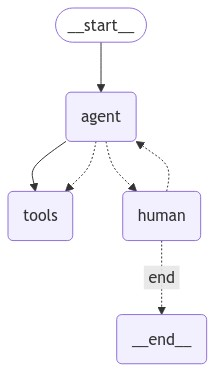

In [4]:
from Libs.libs import *
# from graph import  graph

from IPython.display import Image, display


display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [5]:

# final_state = graph.invoke(
#     {"messages": [
#         HumanMessage(content=input("Put your question: "))
#         ]},
# )


# for output in graph.stream(input):
#     print(output)
    
    
    

user_input = "Hi. is the doctor kevin anderson at 2024-09-03 9:00 am?"
user_input = "Hi. What is mercedes? is it a car?"
inputs = {"messages":[HumanMessage(content=user_input)]}
for s in graph.stream(inputs):
    if "__end__" not in s:
        print(s)
        print("-----")


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_DuJ9CFSlBUzXsP4qgvbH4f5T', 'function': {'arguments': '{"text":"What are the latest features of the 2023 Mercedes-Benz models?"}', 'name': 'mercedes_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 88, 'total_tokens': 117, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2f98fa5f-9f24-4caf-8bc2-f2c8f0b8b24b-0', tool_calls=[{'name': 'mercedes_tool', 'args': {'text': 'What are the latest features of the 2023 Mercedes-Benz models?'}, 'id': 'call_DuJ9CFSlBUzXsP4qgvbH4f5T', 'type': 'tool_call'}], usage_metadata={'input_tokens': 88, 'output_tokens': 29, 'total_tokens': 117})]}}
-----
{'tools': {'messages': [ToolMessage(content='content="As of 2023, Mercedes-Benz introduced several enhan

In [4]:
from Agent.agent_take2 import *
user_input = "Hi. is the doctor kevin anderson at 2024-09-03 9:00 am?"

inputs = {"messages":[HumanMessage(content=user_input)]}
for s in graph.stream(inputs):
    if "__end__" not in s:
        print(s," ", type(s))
        print("-----")


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6N8jxFJ3torFnflKNDfhmFHW', 'function': {'arguments': '{}', 'name': 'check_availability_by_doctor'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 187, 'total_tokens': 201, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d4aa19c2-9861-4489-a950-0bb9872b1666-0', tool_calls=[{'name': 'check_availability_by_doctor', 'args': {}, 'id': 'call_6N8jxFJ3torFnflKNDfhmFHW', 'type': 'tool_call'}], usage_metadata={'input_tokens': 187, 'output_tokens': 14, 'total_tokens': 201})]}}   <class 'langgraph.pregel.io.AddableUpdatesDict'>
-----
Tool entered
{'tools': {'messages': [ToolMessage(content='2024-09-03 08:00Availablity for the doctor kevin andersonis+ +{availability}2024-09-03 08:30Availablity fo